<a href="https://colab.research.google.com/github/MauroBecker/Projeto-Final-BI-Mauro-Becker/blob/main/PreSal_petrography_fuzzy_machine_learning_logK_%26_poro_K_5_class_Dados_Normal_Geilson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning com Lógica Fuzzy

In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('Dados Normalizados Fev01_2025_reduzido 5 linhas.csv', index_col=0)
data.head()

,poco,profundidade,facies,porosidade,porotipo,fraturamento,poroprimaria,dissolucao,cimentacao,substrecrista,permeabilidade
amostra,,,,,,,,,,,
1,0.0,1.97,0.14,2.14,2.18,0,3,2,1,2,2.06
2,0.0,1.98,0.14,2.27,2.18,0,3,1,2,0,2.24
3,0.6,1.37,1.00,1.17,2.48,0,0,1,3,0,1.51
4,0.6,1.37,1.00,1.99,2.40,2,1,0,3,0,1.99
5,0.6,1.37,1.00,1.89,2.48,1,2,0,3,0,1.92


In [19]:
data.shape


(5, 11)

In [20]:
data.describe()

,poco,profundidade,facies,porosidade,porotipo,fraturamento,poroprimaria,dissolucao,cimentacao,substrecrista,permeabilidade
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000
mean,0.360000,1.612000,0.656000,1.892000,2.344000,0.600000,1.80000,0.80000,2.400000,0.400000,1.944000
std,0.328634,0.331391,0.471041,0.428742,0.153232,0.894427,1.30384,0.83666,0.894427,0.894427,0.270241
min,0.000000,1.370000,0.140000,1.170000,2.180000,0.000000,0.00000,0.00000,1.000000,0.000000,1.510000
25%,0.000000,1.370000,0.140000,1.890000,2.180000,0.000000,1.00000,0.00000,2.000000,0.000000,1.920000
50%,0.600000,1.370000,1.000000,1.990000,2.400000,0.000000,2.00000,1.00000,3.000000,0.000000,1.990000
75%,0.600000,1.970000,1.000000,2.140000,2.480000,1.000000,3.00000,1.00000,3.000000,0.000000,2.060000
max,0.600000,1.980000,1.000000,2.270000,2.480000,2.000000,3.00000,2.00000,3.000000,2.000000,2.240000


In [21]:
!pip install -U scikit-fuzzy


In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# DEFINIÇÕES DOS UNIVERSOS

# antecedentes, 10 variáveis da rocha a serem consideradas
poco = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'poco')
profundidade = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'profundidade')
facies = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'facies')
porosidade = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'porosidade')
porotipo = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'porotipo')
fraturamento = ctrl.Antecedent(np.arange(0, 3.5, 0.5), 'fraturamento')
poroprimaria = ctrl.Antecedent(np.arange(0, 3.5, 0.5), 'poroprimaria')
dissolucao = ctrl.Antecedent(np.arange(0, 3.5, 0.5), 'dissolucao')
cimentacao = ctrl.Antecedent(np.arange(0, 3.5, 0.5), 'cimentacao')
substrecrista = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'substrecrista')

# consequente, que será a permeabilidade da rocha
permeabilidade = ctrl.Consequent(np.arange(0, 3.01, 0.01), 'permeabilidade')

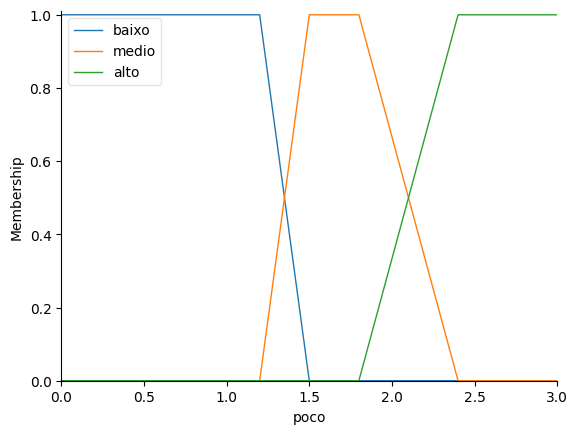

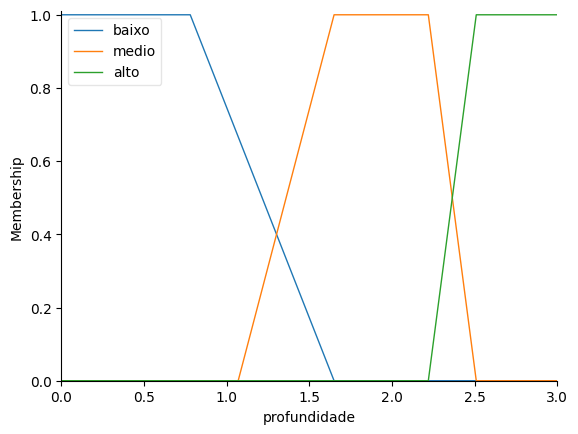

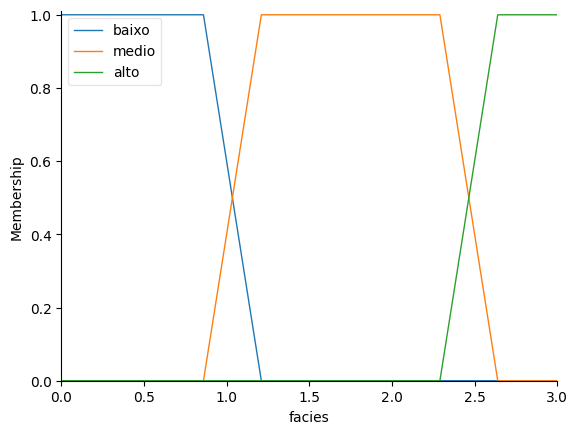

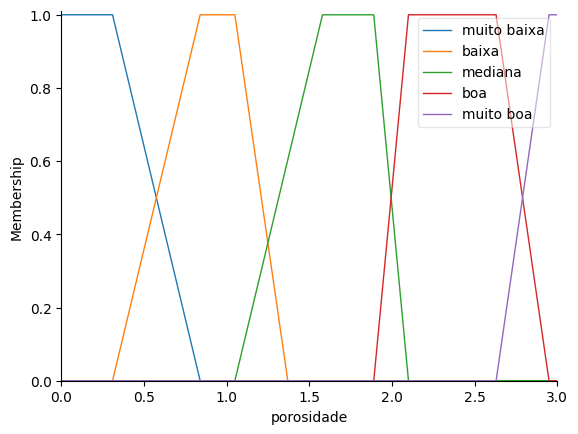

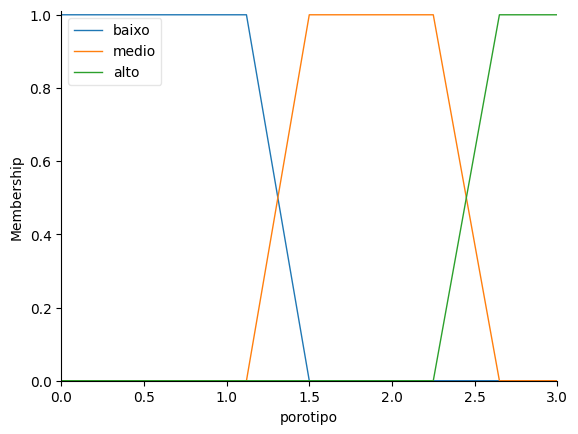

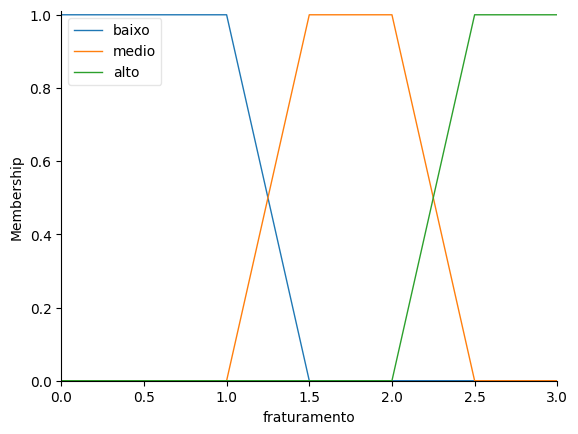

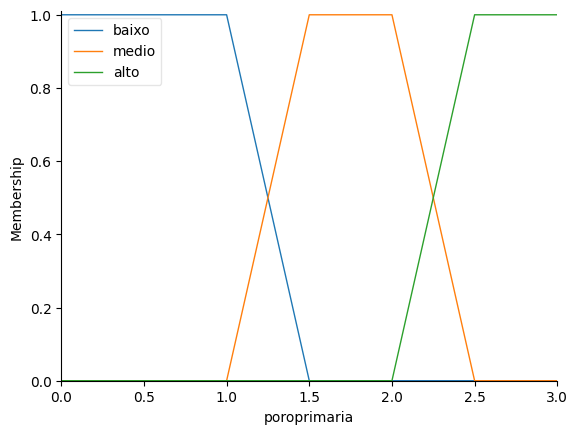

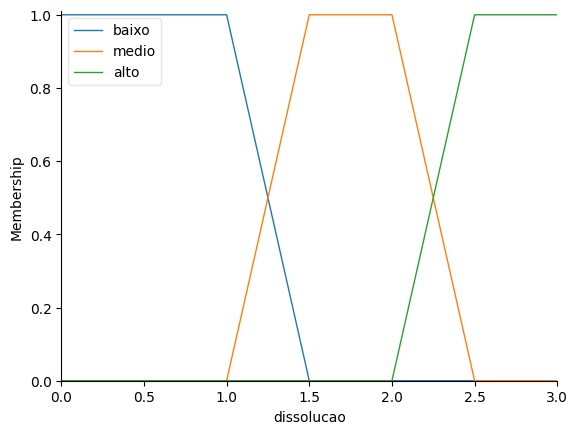

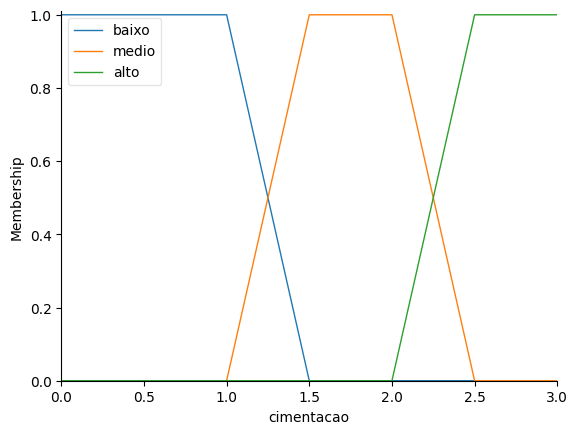

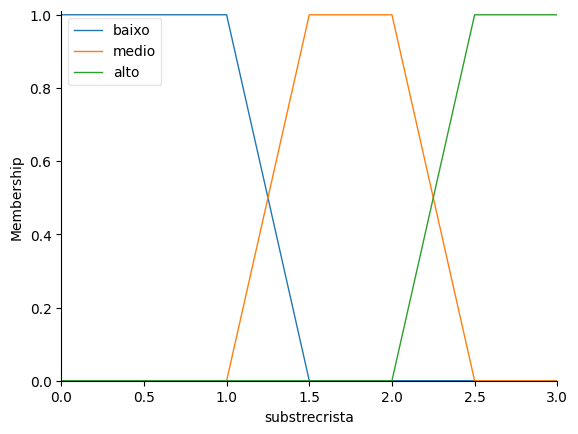

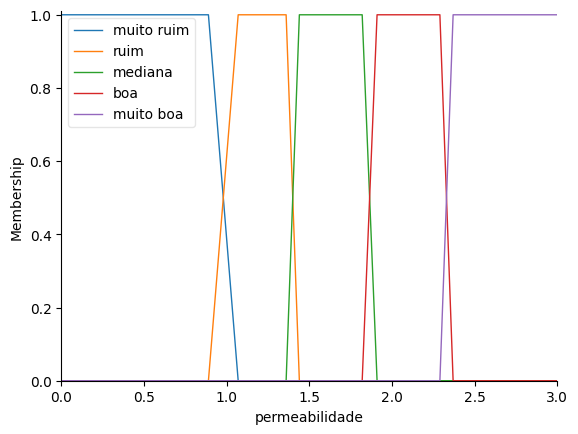

In [23]:
# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA
# poco
poco['baixo'] = fuzz.trapmf(poco.universe, [0, 0, 1.2, 1.5])
poco['medio'] = fuzz.trapmf(poco.universe, [1.2, 1.5, 1.8, 2.4])
poco['alto'] = fuzz.trapmf(poco.universe, [1.8, 2.4, 3, 3])

# profundidade
profundidade['baixo'] = fuzz.trapmf(profundidade.universe, [0, 0, 0.78, 1.65])
profundidade['medio'] = fuzz.trapmf(profundidade.universe, [1.07, 1.65, 2.22, 2.51])
profundidade['alto'] = fuzz.trapmf(profundidade.universe, [2.22, 2.51, 3, 3])

# facies
facies['baixo'] = fuzz.trapmf(facies.universe, [0, 0, 0.86, 1.21])
facies['medio'] = fuzz.trapmf(facies.universe, [0.86, 1.21, 2.29, 2.64])
facies['alto'] = fuzz.trapmf(facies.universe, [2.29, 2.64, 3, 3])

# porosidade
porosidade['muito baixa'] = fuzz.trapmf(porosidade.universe, [0, 0, 0.31, 0.84])
porosidade['baixa'] = fuzz.trapmf(porosidade.universe, [0.31, 0.84, 1.05, 1.37])
porosidade['mediana'] = fuzz.trapmf(porosidade.universe, [1.05, 1.58, 1.89, 2.10])
porosidade['boa'] = fuzz.trapmf(porosidade.universe, [1.89, 2.10, 2.63, 2.95])
porosidade['muito boa'] = fuzz.trapmf(porosidade.universe, [2.63, 2.95, 3.0, 3.0])

# porotipo
porotipo['baixo'] = fuzz.trapmf(porotipo.universe, [0, 0, 1.12, 1.5])
porotipo['medio'] = fuzz.trapmf(porotipo.universe, [1.12, 1.5, 2.25, 2.65])
porotipo['alto'] = fuzz.trapmf(porotipo.universe, [2.25, 2.65, 3, 3])

# fraturamento
fraturamento['baixo'] = fuzz.trapmf(fraturamento.universe, [0, 0, 1, 1.5])
fraturamento['medio'] = fuzz.trapmf(fraturamento.universe, [1, 1.5, 2, 2.5])
fraturamento['alto'] = fuzz.trapmf(fraturamento.universe, [2, 2.5, 3, 3])

# poroprimaria
poroprimaria['baixo'] = fuzz.trapmf(poroprimaria.universe, [0, 0, 1, 1.5])
poroprimaria['medio'] = fuzz.trapmf(poroprimaria.universe, [1, 1.5, 2, 2.5])
poroprimaria['alto'] = fuzz.trapmf(poroprimaria.universe, [2, 2.5, 3, 3])

# dissolucao
dissolucao['baixo'] = fuzz.trapmf(dissolucao.universe, [0, 0, 1, 1.5])
dissolucao['medio'] = fuzz.trapmf(dissolucao.universe, [1, 1.5, 2, 2.5])
dissolucao['alto'] = fuzz.trapmf(dissolucao.universe, [2, 2.5, 3, 3])

# cimentacao
cimentacao['baixo'] = fuzz.trapmf(cimentacao.universe, [0, 0, 1, 1.5])
cimentacao['medio'] = fuzz.trapmf(cimentacao.universe, [1, 1.5, 2, 2.5])
cimentacao['alto'] = fuzz.trapmf(cimentacao.universe, [2, 2.5, 3, 3])

# substrecrista
substrecrista['baixo'] = fuzz.trapmf(substrecrista.universe, [0, 0, 1, 1.5])
substrecrista['medio'] = fuzz.trapmf(substrecrista.universe, [1, 1.5, 2, 2.5])
substrecrista['alto'] = fuzz.trapmf(substrecrista.universe, [2, 2.5, 3, 3])


# permeabilidade
permeabilidade['muito ruim'] = fuzz.trapmf(permeabilidade.universe, [0, 0, 0.89, 1.07])
permeabilidade['ruim'] = fuzz.trapmf(permeabilidade.universe, [0.89, 1.07, 1.36, 1.44])
permeabilidade['mediana'] = fuzz.trapmf(permeabilidade.universe, [1.36, 1.44, 1.82, 1.91])
permeabilidade['boa'] = fuzz.trapmf(permeabilidade.universe, [1.82, 1.91, 2.29, 2.37])
permeabilidade['muito boa'] = fuzz.trapmf(permeabilidade.universe, [2.29, 2.37, 3, 3])


# VISUALIZAÇÃO DAS FUNÇÕES DE PERTINÊNCIA

poco.view()
profundidade.view()
facies.view()
porosidade.view()
porotipo.view()
fraturamento.view()
poroprimaria.view()
dissolucao.view()
cimentacao.view()
substrecrista.view()

permeabilidade.view()



Em seguida, vamos criar as regras para esse sistema:


In [24]:
regra1 = ctrl.Rule(porosidade['muito baixa'], permeabilidade['muito ruim'])

regra2 = ctrl.Rule(porosidade['baixa'], permeabilidade['ruim'])

regra3 = ctrl.Rule(porosidade['mediana'], permeabilidade['mediana'])

regra4 = ctrl.Rule(porosidade['boa'], permeabilidade['boa'])

regra5 = ctrl.Rule(porosidade['muito boa'], permeabilidade['muito boa'])


regra6 = ctrl.Rule(poco['baixo'] & profundidade ['baixo'] & facies ['baixo'], permeabilidade['muito boa'])

regra7 = ctrl.Rule(poco['baixo'] & profundidade ['medio'] & facies ['medio'], permeabilidade['boa'])

regra8 = ctrl.Rule(poco['baixo'] & profundidade ['alto'] & facies ['alto'], permeabilidade['mediana'])

regra9 = ctrl.Rule(poco['medio'] & profundidade ['baixo'] & facies ['baixo'], permeabilidade['boa'])

regra10 = ctrl.Rule(poco['medio'] & profundidade ['medio'] & facies ['medio'], permeabilidade['mediana'])

regra11 = ctrl.Rule(poco['medio'] & profundidade ['alto'] & facies ['alto'], permeabilidade['ruim'])

regra12 = ctrl.Rule(poco['alto'] & profundidade ['baixo'] & facies ['baixo'], permeabilidade['mediana'])

regra13 = ctrl.Rule(poco['alto'] & profundidade ['medio'] & facies ['medio'], permeabilidade['ruim'])

regra14 = ctrl.Rule(poco['alto'] & profundidade ['alto'] & facies ['alto'], permeabilidade['muito ruim'])


regra15 = ctrl.Rule(dissolucao['baixo'] & cimentacao ['baixo'] & substrecrista ['baixo'], permeabilidade['mediana'])

regra16 = ctrl.Rule(dissolucao['baixo'] & cimentacao ['medio'] & substrecrista ['medio'], permeabilidade['ruim'])

regra17 = ctrl.Rule(dissolucao['baixo'] & cimentacao ['alto'] & substrecrista ['alto'], permeabilidade['muito ruim'])

regra18 = ctrl.Rule(dissolucao['medio'] & cimentacao ['baixo'] & substrecrista ['baixo'], permeabilidade['boa'])

regra19 = ctrl.Rule(dissolucao['medio'] & cimentacao ['medio'] & substrecrista ['medio'], permeabilidade['mediana'])

regra20 = ctrl.Rule(dissolucao['medio'] & cimentacao ['alto'] & substrecrista ['alto'], permeabilidade['ruim'])

regra21 = ctrl.Rule(dissolucao['alto'] & cimentacao ['baixo'] & substrecrista ['baixo'], permeabilidade['muito boa'])

regra22 = ctrl.Rule(dissolucao['alto'] & cimentacao ['medio'] & substrecrista ['medio'], permeabilidade['boa'])

regra23 = ctrl.Rule(dissolucao['alto'] & cimentacao ['alto'] & substrecrista ['alto'], permeabilidade['mediana'])


regra24 = ctrl.Rule(poroprimaria['baixo'] & fraturamento ['baixo'] & porotipo ['baixo'], permeabilidade['muito ruim'])

regra25 = ctrl.Rule(poroprimaria['baixo'] & fraturamento ['medio'] & porotipo ['medio'], permeabilidade['ruim'])

regra26 = ctrl.Rule(poroprimaria['baixo'] & fraturamento ['alto'] & porotipo ['alto'], permeabilidade['mediana'])

regra27 = ctrl.Rule(poroprimaria['medio'] & fraturamento ['baixo'] & porotipo ['baixo'], permeabilidade['ruim'])

regra28 = ctrl.Rule(poroprimaria['medio'] & fraturamento ['medio'] & porotipo ['medio'], permeabilidade['mediana'])

regra29 = ctrl.Rule(poroprimaria['medio'] & fraturamento ['alto'] & porotipo ['alto'], permeabilidade['boa'])

regra30 = ctrl.Rule(poroprimaria['alto'] & fraturamento ['baixo'] & porotipo ['baixo'], permeabilidade['mediana'])

regra31 = ctrl.Rule(poroprimaria['alto'] & fraturamento ['medio'] & porotipo ['medio'], permeabilidade['boa'])

regra32 = ctrl.Rule(poroprimaria['alto'] & fraturamento ['alto'] & porotipo ['alto'], permeabilidade['muito boa'])




reservatorio_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25, regra26, regra27, regra28, regra29, regra30,  regra31, regra32])
engine = ctrl.ControlSystemSimulation(reservatorio_ctrl)

Unexpected input: amostra
Unexpected input: permeabilidade

porosidade : 2.14
poco : 0.0
profundidade : 1.97
facies : 0.14
dissolucao : 2.0
cimentacao : 1.0
substrecrista : 2.0
poroprimaria : 3.0
fraturamento : 0.0
porotipo : 2.18



Calculated permeability for row 1: 2.097347670250896
Permeabilidade: 125.12603137335444
   amostra  poco  profundidade  facies  porosidade  porotipo  fraturamento  \
0        1   0.0          1.97    0.14        2.14      2.18             0   
1        2   0.0          1.98    0.14        2.27      2.18             0   
2        3   0.6          1.37    1.00        1.17      2.48             0   
3        4   0.6          1.37    1.00        1.99      2.40             2   
4        5   0.6          1.37    1.00        1.89      2.48             1   

   poroprimaria  dissolucao  cimentacao  substrecrista  permeabilidade  \
0             3           2           1              2            2.06   
1             3           1           2              0       

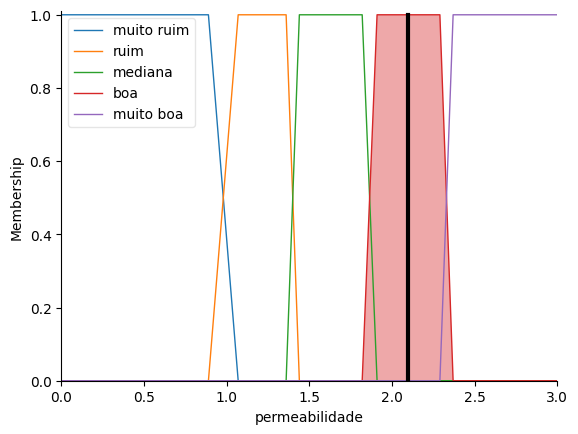

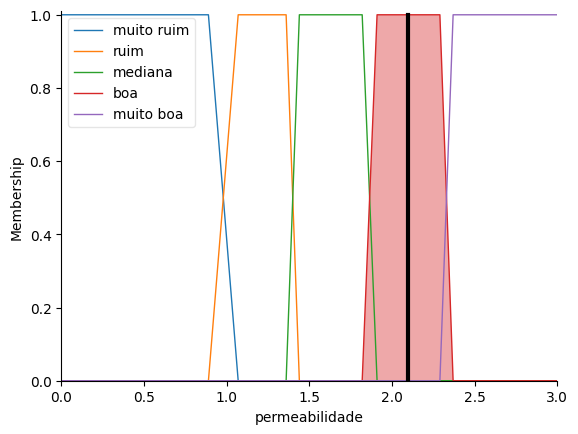

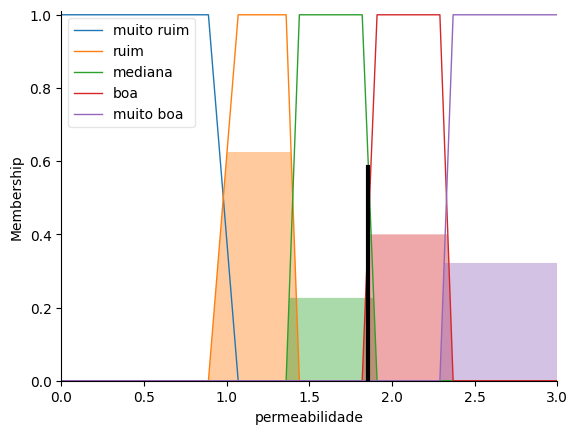

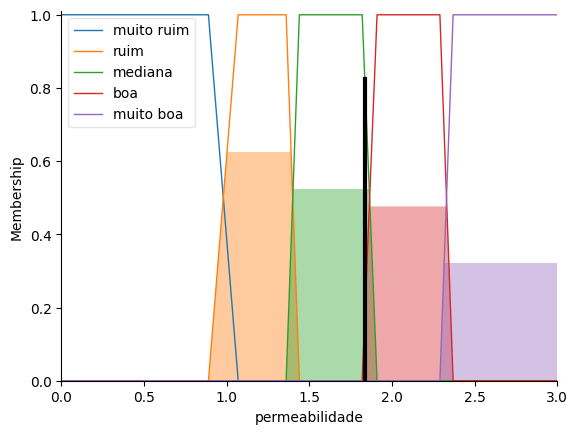

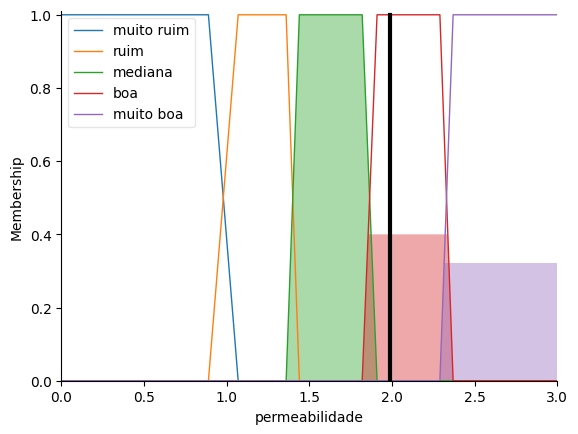

In [42]:

def set_input_attributes(input_obj, input_data):
    for key, value in input_data.items():
        try:
            input_obj[str(key)] = value
        except ValueError as e:
            print(e)

# Read the CSV file
df = pd.read_csv('Dados Normalizados Fev01_2025_reduzido 5 linhas.csv')

# Iterate through each row in the DataFrame
for index, row in df.iterrows():

    # Set the engine.input values
    set_input_attributes(engine.input, row)

    print(f'\n{engine.input}\n')

    # Calculate the fuzzy system output
    engine.compute()

    # Get the permeability output
    permeability = engine.output['permeabilidade']

    # retorna o valor crisp e o gráfico mostrando-o
    permeabilidade.view(sim=engine)

    # Print the updated engine.input values for each row
    print(f"\nCalculated permeability for row {index + 1}: {permeability}")

    # Calculate the inverse of the base-10 logarithm
    inverse_log_permeability = 10 ** permeability
    print(f"Permeabilidade: {inverse_log_permeability}")

    # update the DataFrame
    df.loc[index, 'pred'] = permeability

    # Display the updated DataFrame
    print(df)

    df.to_csv('your_dataframe.csv', index=False)

    # Calculate the average of the 'permeability' and 'pred' column
    average_pred = df['pred'].mean()
    average_permeabilidade = df['permeabilidade'].mean()

    # Display the result
    print(f"The average of the 'pred' column is: {average_pred}")
    print(f"The average of the 'permeabilidade' column is: {average_permeabilidade}")

    # Calculate the difference
    average_difference = average_pred - average_permeabilidade

    # Print the results
    print(f"The difference between the averages is: {average_difference}")


2.097347670250896


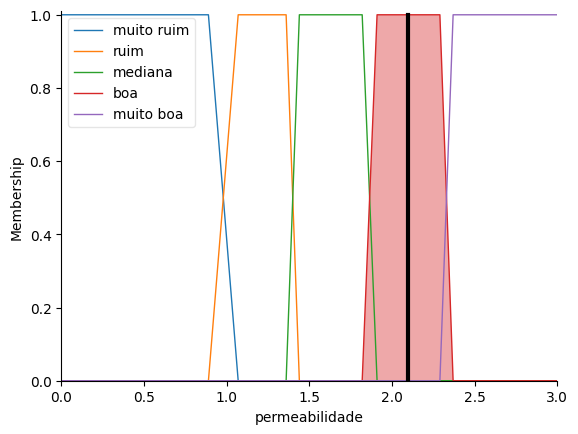

In [12]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
engine.input['poco'] = 0
engine.input['profundidade'] = 1.98
engine.input['facies'] = 0.14
engine.input['porosidade'] = 2.27
engine.input['porotipo'] = 2.18
engine.input['fraturamento'] = 0
engine.input['poroprimaria'] = 3
engine.input['dissolucao'] = 1
engine.input['cimentacao'] = 2
engine.input['substrecrista'] = 0


# calcula a saída do sistema de controle fuzzy
engine.compute()

# retorna o valor crisp e o gráfico mostrando-o
print(engine.output['permeabilidade'])
permeabilidade.view(sim=engine)



In [ ]:
import math
# Assuming engine.output['permeabilidade'] contains the permeability value
permeability = engine.output['permeabilidade']
print(f"O logaritmo da permeabilidade: {permeability}")

# Calculate the inverse of the base-10 logarithm
inverse_log_permeability = 10 ** permeability
print(f"Permeabilidade: {inverse_log_permeability}")

O logaritmo da permeabilidade: 2.097347670250896
Permeabilidade: 125.12603137335444
